In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Loading dataset and making data selections

Load the data into an xarray dataset

In [14]:
dataset = xr.load_dataset('/home/ben/ibots/workshop_data/steinmetz_mouse/convert_steinmetz_dataset/data/processed/neuropixels/steinmetz_2016-12-14_Cori.nc')

Locate the data relevant to the pupil and store it in a variable named `pupil_data`. Hint - you can use `dataset[variable_names]`

In [15]:
pupil_data = dataset[["pupil_area", "pupil_x", "pupil_y"]]

Individual trials can be selected using the `.sel` method on `pupil_data`. 
Select the data corresponding to trial 50 and set it to a variable named `trial_50`

In [20]:
trial_50 = pupil_data.sel(trial=50)

Convert the trial 50 data to a dataframe and reset the index (just as was done in the previous session). Name the dataframe `df`

In [32]:
df = trial_50.to_dataframe()
df.reset_index(inplace=True)

## 2) Visualisation - Scatter plots and colourbars

Make a scatter plot showing the x and y positions of the pupil during trial 50

Text(0, 0.5, 'pupil y position')

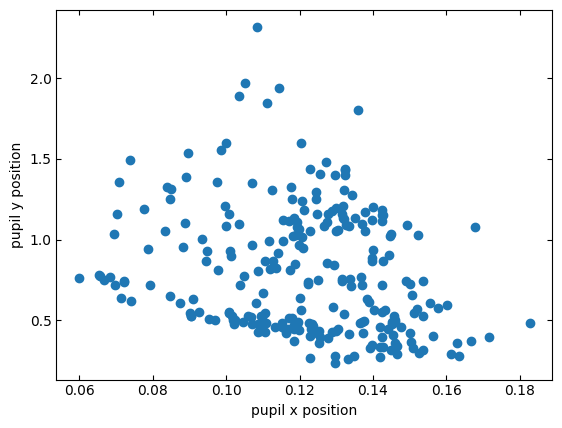

In [33]:
plt.scatter(df.pupil_x, df.pupil_y)

plt.xlabel('pupil x position')
plt.ylabel('pupil y position')

It is helpful to visualise the arrow of time in the above plot. 

Make the same scatter plot where the points are coloured according to the time in the trial. 

Hint - use `plt.scatter?` to show information about the scatter function and choose the appropriate argument to use. 

A colourbar is displayed with `plt.colorbar()`

In [57]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    The linewidth 

Text(0, 0.5, 'pupil y position')

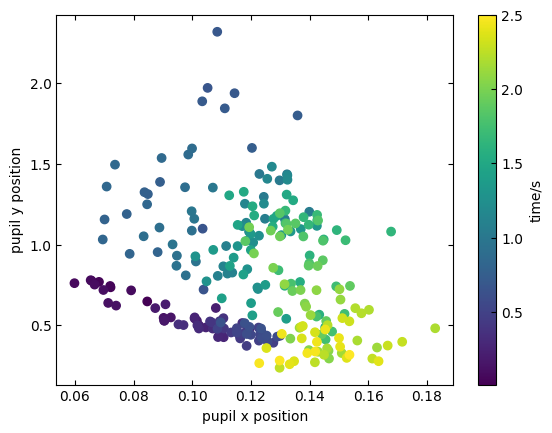

In [38]:
plt.scatter(df.pupil_x, df.pupil_y, c=df.time)
plt.colorbar(label='time/s')

plt.xlabel('pupil x position')
plt.ylabel('pupil y position')

## 3) Pupil speed 

Let's investigate the how the speed of the pupil behaves over all trials. First, make a dataframe named `df` containing the pupil data from all trials.

In [78]:
df = pupil_data.to_dataframe()
df.reset_index(inplace=True)

Now calculate the speed of the pupil in the x direction. Speed is the distance moved in a time interval divided by that time interval. 

First find the distance moved between timepoints in the x direction

In [62]:
pupil_x_distance = df['pupil_x'].diff()

In [ ]:
Then get the difference between timepoints

In [79]:
time_difference = df['time'].diff()

Calculate the speed in the x direction using the two differences calculated above and add a new column in `df` named `pupil_x_speed` containing this information

In [83]:
pupil_x_speed = pupil_x_distance/time_difference

df['pupil_x_speed'] = pupil_x_speed

Do the same for the y-direction

In [84]:
df['pupil_y_speed'] = df['pupil_y'].diff()/time_difference

Calculate the magnitude of the speed by summing the squares of the speeds in each direction and squarerooting.

Add a new column named `pupil_speed` to `df`

In [85]:
df['pupil_speed'] = np.sqrt(df['pupil_y_speed']**2 + df['pupil_x_speed']**2)

We may now analyse statistics of the pupil speed across all trials with the pandas `groupby` function.

Use the `groupby` function to find the mean pupil speed for each trial

In [88]:
df.groupby('trial')['pupil_speed'].mean()

trial
1      7.326171
2      5.757743
3      7.230327
4      4.599598
5      7.413824
         ...   
360    3.648732
361    3.339259
362    4.137778
363    4.436973
364    3.421289
Name: pupil_speed, Length: 364, dtype: float64

Plot a histogram of the mean pupil speeds for each trial

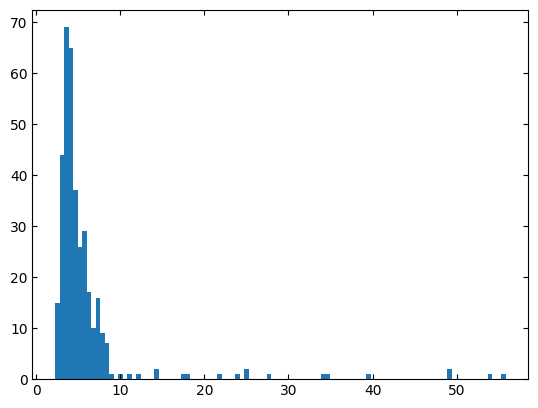

In [89]:
plt.hist(df.groupby('trial')['pupil_speed'].mean(), 100);